In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
df = pd.read_csv("/content/sample_data/student-scores.csv")

# Preview the data
print(df.head())


   id first_name last_name                                  email  gender  \
0   1       Paul     Casey         paul.casey.1@gslingacademy.com    male   
1   2   Danielle  Sandoval  danielle.sandoval.2@gslingacademy.com  female   
2   3       Tina   Andrews       tina.andrews.3@gslingacademy.com  female   
3   4       Tara     Clark         tara.clark.4@gslingacademy.com  female   
4   5    Anthony    Campos     anthony.campos.5@gslingacademy.com    male   

   part_time_job  absence_days  extracurricular_activities  \
0          False             3                       False   
1          False             2                       False   
2          False             9                        True   
3          False             5                       False   
4          False             5                       False   

   weekly_self_study_hours   career_aspiration  math_score  history_score  \
0                       27              Lawyer          73             81   
1         

In [15]:
df.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


In [16]:
df.describe()

,id,absence_days,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,1000.500000,3.665500,17.755500,83.452000,80.332000,81.336500,79.995000,79.58150,81.277500,80.888000
std,577.494589,2.629271,12.129604,13.224906,12.736046,12.539453,12.777895,13.72219,12.027087,11.637705
min,1.000000,0.000000,0.000000,40.000000,50.000000,50.000000,50.000000,30.00000,50.000000,60.000000
25%,500.750000,2.000000,5.000000,77.000000,69.750000,71.000000,69.000000,69.00000,72.000000,71.000000
50%,1000.500000,3.000000,18.000000,87.000000,82.000000,83.000000,81.000000,81.00000,83.000000,81.000000
75%,1500.250000,5.000000,28.000000,93.000000,91.000000,92.000000,91.000000,91.00000,91.000000,91.000000
max,2000.000000,10.000000,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,99.000000,100.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2000 non-null   int64 
 1   first_name                  2000 non-null   object
 2   last_name                   2000 non-null   object
 3   email                       2000 non-null   object
 4   gender                      2000 non-null   object
 5   part_time_job               2000 non-null   bool  
 6   absence_days                2000 non-null   int64 
 7   extracurricular_activities  2000 non-null   bool  
 8   weekly_self_study_hours     2000 non-null   int64 
 9   career_aspiration           2000 non-null   object
 10  math_score                  2000 non-null   int64 
 11  history_score               2000 non-null   int64 
 12  physics_score               2000 non-null   int64 
 13  chemistry_score             2000 non-null   int6

In [18]:
df.isnull().sum()

,0
id,0
first_name,0
last_name,0
email,0
gender,0
part_time_job,0
absence_days,0
extracurricular_activities,0
weekly_self_study_hours,0
career_aspiration,0


In [19]:
subject_score=['math_score','history_score', 'physics_score', 'chemistry_score',
    'biology_score', 'english_score', 'geography_score'
]

df['average_score']=df[subject_score].mean(axis=1)


In [20]:
df['average_score'].head(10)

,average_score
0,82.000000
1,91.428571
2,86.428571
3,78.714286
4,74.428571
5,82.000000
6,84.714286
7,82.000000
8,81.142857
9,76.714286


In [21]:
print(df[['weekly_self_study_hours', 'average_score']].head())

   weekly_self_study_hours  average_score
0                       27      82.000000
1                       47      91.428571
2                       13      86.428571
3                        3      78.714286
4                       10      74.428571


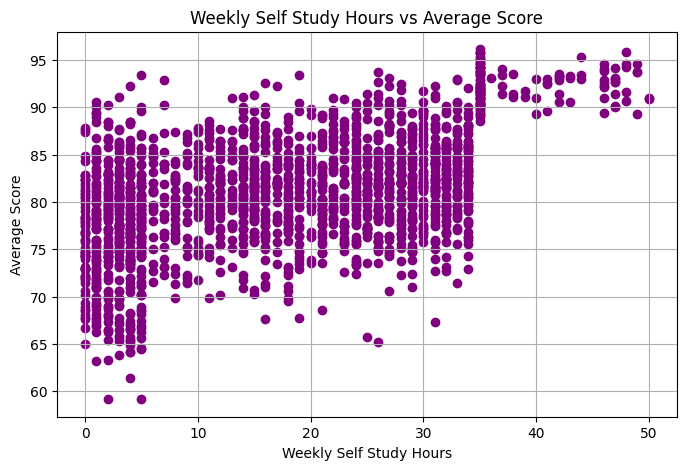

In [22]:
 plt.figure(figsize=(8,5))
 plt.scatter(df['weekly_self_study_hours'],df['average_score'],color='purple')
 plt.xlabel('Weekly Self Study Hours')
 plt.ylabel('Average Score')
 plt.title('Weekly Self Study Hours vs Average Score')
 plt.grid(True)
 plt.show()

In [23]:
df['gender']=df['gender'].map({'male':0, 'female': 1})
df['part_time_job'] = df['part_time_job'].astype(int)
df['extracurricular_activities']= df['extracurricular_activities'].astype(int)

In [24]:
x=df[['weekly_self_study_hours' , 'absence_days', 'gender', 'part_time_job', 'extracurricular_activities']]
y=df['average_score']

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
scaler =StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [38]:
knn_model = KNeighborsRegressor(n_neighbors=7)
knn_model.fit(x_train_scaled,y_train)

KNeighborsRegressor(n_neighbors=7)

In [39]:
y_pred_knn = knn_model.predict(x_test_scaled)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

In [40]:
print("🔷 KNN Regression Results")
print("Mean Squared Error (MSE):", round(mse_knn, 2))
print("R² Score:", round(r2_knn, 2))


🔷 KNN Regression Results
Mean Squared Error (MSE): 32.21
R² Score: 0.25


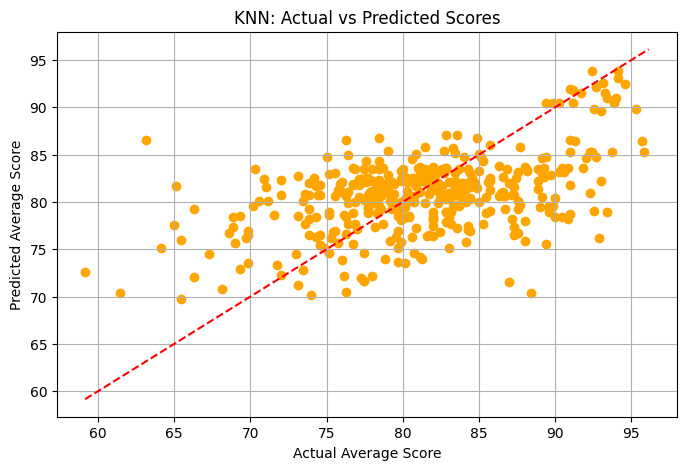

In [30]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_knn, color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Average Score")
plt.ylabel("Predicted Average Score")
plt.title("KNN: Actual vs Predicted Scores")
plt.grid(True)
plt.show()

LINEAR REGRESSION

In [31]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [32]:
y_pred=model.predict(x_test)

In [33]:
result = pd.DataFrame({'Actual' : y_test.values, 'Predicted':y_pred})
result.head()

,Actual,Predicted
0,90.428571,81.784732
1,79.857143,77.004270
2,76.714286,81.097808
3,74.571429,77.368888
4,76.857143,77.409392


In [34]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [35]:
print("Mean Squared Error (MSE):", round(mse, 2))
print("R² Score:", round(r2, 2))

Mean Squared Error (MSE): 30.87
R² Score: 0.28


In [36]:
coefficients = pd.Series(model.coef_, index=x.columns)
print("\nFeature Impact (Coefficients):")
print(coefficients)



Feature Impact (Coefficients):
weekly_self_study_hours       0.225712
absence_days                 -0.179410
gender                        0.349034
part_time_job                -1.113049
extracurricular_activities    0.130559
dtype: float64


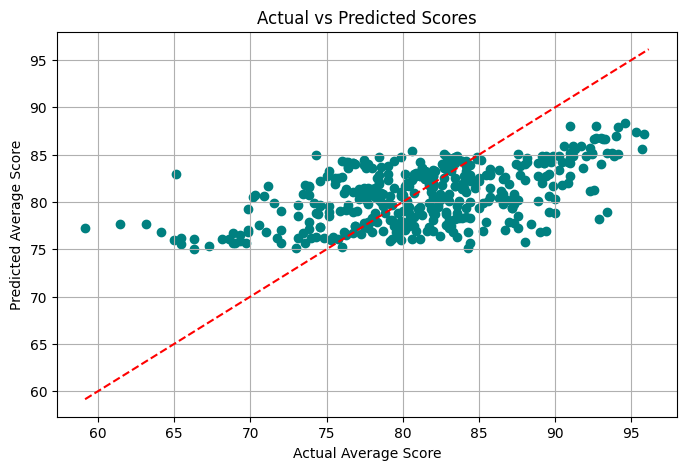

In [37]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Average Score")
plt.ylabel("Predicted Average Score")
plt.title("Actual vs Predicted Scores")
plt.grid(True)
plt.show()
